<h1>Monte Carlo Method</h1>

In [1]:
import random
import numpy as np
import enum
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
resMean = []
resMed = []
K = 1000
for n in [100,400,1600]:
    res_k_mean = []
    res_k_median = []
    for k in range(K):
        df = np.random.normal(size=n) # 生成样本量为n的随机数
        res_k_mean.append(np.mean(df)) 
        res_k_median.append(np.median(df)) 
    resMean.append(np.array(res_k_mean).std())
    resMed.append(np.array(res_k_median).std())
print(resMean)
print(resMed)

[0.0989718094341586, 0.05016113758512079, 0.024325357245269505]
[0.12153128244273734, 0.06309120397893601, 0.030420593414110575]


## Conditional probability

When two events are independent, their joint probability is the product of each event:

$$P(E,F) = P(E)P(F)$$

Their conditional probability is the joint probability divided by the conditional (i.e., P(F)).

$$P(E|F) = \frac{P(E,F)}{P(F)}$$

And so for our two challenge scenarios, we have:

Question 1:

B = both children are girls,
G = the older children is a girl, calculate $P(B|G).$

This can be stated as: 

$$P(B|G) = \frac{P(B,G)}{P(G)}$$

Question 2:

B = both children are girls,
L = at least one children is a girl, calculate $P(B|L)$

This can be stated as: 

$$P(B|L) =  \frac{P(B,L)}{P(L)}$$

In [5]:
import random
BOY=1
GIRL=2

def randomKid():
    return random.choice([BOY, GIRL])

both_girls = 0
older_girl = 0
either_girl = 0
#random.seed(0)
for _ in range(50000):
    older = randomKid()
    younger = randomKid()
    if older == GIRL:
        older_girl += 1
    if older == GIRL and younger == GIRL:
        both_girls += 1
    if older == GIRL or younger == GIRL:
        either_girl += 1

print("P(both | older):", both_girls/older_girl)   # 0.5007089325501317
print("P(both | either):", both_girls/either_girl) # 0.3311897106109325

P(both | older): 0.49872601321761284
P(both | either): 0.3343743326927183


##  Monte Carlo Integration

https://jotterbach.github.io/content/posts/mc_ode/2018-08-08-MonteCarloODE/
<br>
<font style='font-size:18px; line-height:24px;'>
    
- MC is a workhorse in many areas:
    - from fundamental science over applied engineering to financialindustry. 
- A rather short, but nevertheless nice introduction can be found in this lecture
- We are going to learn how to use the Monte carlo method to calculate the integral
- from there, we will learn how to apply the same method for solving differential equations

   Now let consider an integral in the form of 
   $$ I = \int_a^b f(x)dx $$
    
   By the mid-point theorem of integral, there is a $x^*\in[a,b],$
    $$ \int_a^b f(x)dx = f(x^*)(b-a) \triangleq f^*(b-a)$$

    At this special point the integral can be expressed through the area formula for a rectangle $ I=height*width,$ where the effective height is given by $ f^* $. This value represents the
average height of the function over the interval. This means all we need to do to solve this integral is to estimate the average height of the function.

     this can be done quite simple usingrandom variables: Assume we draw $M$ random variables $ X_i \sim u(a,b) $ 
from the uniform distribution over $[a,b].$ We can then estimate the average height of
as

$$ f^*=\mathbb{E}_{x \sim u(a,b)} f(x) = \frac1{M}\sum_{i=1}^M f(x_i) $$

    Plugging this all together we arrive at a simple way to evaluate the above integral

$$ \int_a^b f(x)dx = \frac{b-a}{M}\sum_{i=1}^M f(x_i) $$



</font>

In [6]:
#用均值代替中值定理的f(x*)
from scipy import integrate
import math
#integrate.quad(math.exp, 0, 1)

In [7]:
def mc_int(func, domain, n_samples):
    samples = np.random.uniform(low=domain[0], # a 
                                high=domain[1], # b
                                size=n_samples) 
    volume = abs(domain[1] - domain[0]) # b - a
    return volume*np.mean(func(samples)) #上述的公式

def testIntegral(func, domain, nsam=1000, nrep=10):
    ys=[mc_int(func, domain , nsam) for i in range(nrep)]
    #print(ys)
    y_mean = np.mean(ys)  
    y_std = np.std(ys)
    print(str(nsam).rjust(10),str(nrep).rjust(7), #将字符串 nsam 右对齐，且占 10 个字符宽度。
          '%.8f' % y_mean, '%.8f' % y_std)  
    return y_mean

In [9]:
domain=[0,1]

def func(x):
    return 4*x**3 + 2 * x**2 - 3**x + np.cos(x)

print('Result of numeric integral:', integrate.quad(func, domain[0], domain[1]))
#integrate.quad(func, a, b) 返回一个包含两个值的元组：
#第一个值是积分的数值结果，即在区间 [a, b] 上对 func 进行积分的结果。
#第二个值是积分误差的估计值。

def F(x):
    return x**4  + 2*x**3/3 - 3**x/np.log(3) + np.sin(x)
print('Analytic solution:', F(domain[1])-F(domain[0]))

for n in [10,40,160,640,640*4,640*4*4]:
    testIntegral(func, domain, n)

Result of numeric integral: (0.6876591982208885, 8.640431417952585e-15)
Analytic solution: 0.6876591982208882
        10      10 0.54180637 0.22744918
        40      10 0.62877034 0.15500404
       160      10 0.72223535 0.12369762
       640      10 0.67782611 0.03224944
      2560      10 0.69887984 0.02692165
     10240      10 0.68364672 0.00829629


In [10]:
### more drawing or more replication?
for n in [1,2,3,4,5,6]:
    nsim=10**n
    nrep=4**(7-n)
    testIntegral(func, domain, nsim, nrep)

        10    4096 0.69105991 0.32567300
       100    1024 0.68448272 0.10562852
      1000     256 0.68668413 0.03483767
     10000      64 0.68905351 0.00931706
    100000      16 0.68858101 0.00281770
   1000000       4 0.68839892 0.00128533


In [11]:
domain=[0,1]

for nsim in 10**np.array([1,2,3,4,5,6]):
    testIntegral(np.exp, domain, nsim)

        10      10 1.79926349 0.09072515
       100      10 1.73550747 0.03666559
      1000      10 1.72235573 0.01190673
     10000      10 1.71699536 0.00313678
    100000      10 1.71845157 0.00213654
   1000000      10 1.71802270 0.00037874


## Different interpretations of Monte Carlo Method

<font style='font-size:22px; line-height:30px;'>
Suppose we wish to estimate the area, AD, of an arbitrary-shaped two dimensional domain,

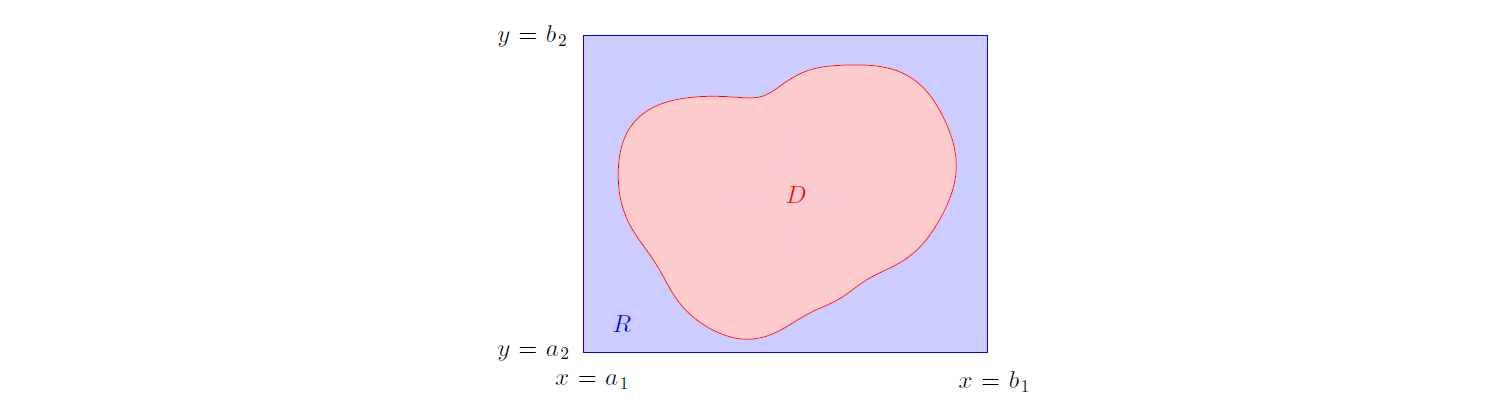

By randomly choose a point (X, Y) in the rectangle R. The probability of the point inside area D is the ratio of area D over area R.

$$ P((X,Y) \in D)=\frac{A_D}{A_R} $$

We next introduce a Bernoulli random variable, (hit-or miss)

$$ B=\left\{ \begin{array}{rcl} 0, & (X,Y) \notin D  \\ 1, & (X,Y) \in D  \end{array}\right. $$

then the expected value of B is 

$$ \mathbb{E}(B) = P((X,Y) \in D)=\frac{A_D}{A_R} = \theta $$

We have thus recast the area-estimation problem as a mean-estimation problem moreprecisely, estimation of the Bernoulli parameter $\theta$.

we now can consider the integration problem regardless how the function form is defined, 

i.e. defined explicitely: $ y=f(x) $ or implicitely: $f(x,y)=0$

Consider the integration of $x^2+y^2=1$, in domain [0,1], 


</font>

In [13]:
## using the explicite form 
testIntegral(lambda x: np.sqrt(1-x*x), [0,1], 1000000)

   1000000      10 0.78553327 0.00022774


0.7855332735292613

In [14]:
## using the implicite form
# 用抽样方式算积分
domainX=[0,1]
domainY=[0,1]
def funcXY(x,y):
    return x**2+y**2<1

n_samples=100000
samplesX = np.random.uniform(low=domainX[0], high=domainX[1], size=n_samples)
samplesY = np.random.uniform(low=domainY[0], high=domainY[1], size=n_samples)

areaOfDomain=abs(domainX[1]-domainX[0])*abs(domainY[1]-domainY[0])
propOfD = sum(funcXY(samplesX, samplesY))/n_samples

areaOfD = areaOfDomain*propOfD
print(areaOfD)

0.7851


In [25]:
### the analytical solution is 
np.pi/4

0.7853981633974483

## Checking the Quality of Random Number Generator

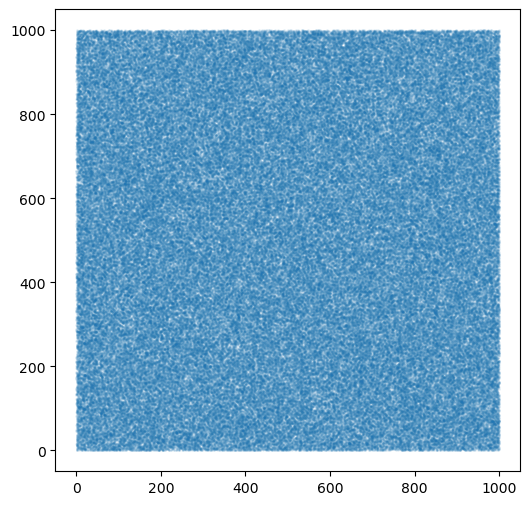

In [21]:
domainX=[0,1000]
domainY=[0,1000]
n_samples=300000
samplesX = np.random.uniform(domainX[0], domainX[1], n_samples)
samplesY = np.random.uniform(domainY[0], domainY[1], n_samples)
plt.subplots(figsize=(6,6))
plt.scatter(samplesX,samplesY, s=1, alpha=0.1) #分别为散点的大小和透明度
plt.show()

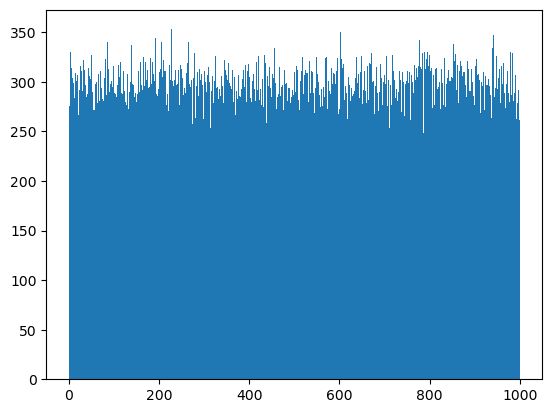

In [22]:
## histogram maybe misleading !!!
_=plt.hist(samplesX, bins=1000)

In [47]:
domainX
n_samples

300000

In [29]:
def counter(x):
    dd = dict()  # 创建一个空字典
    for k in x:
        if k in dd:
            dd[k] += 1  # 如果 k 已经在字典中，将其对应的值加 1
        else:
            dd[k] = 1  # 如果 k 不在字典中，将 k 添加到字典，值设为 1
    return dd

samplesX = np.random.randint(0, domainX[1], n_samples)#= 300,000
numcounts=list(counter(samplesX).values()) #将其字典化取values
minCount=min(numcounts)
maxCount=max(numcounts)
print('len:', len(numcounts), 'min value:', min(samplesX),  'max value:', max(samplesX), 
      'min count:', minCount,'max count:', maxCount,)
print(np.mean(numcounts))
print(np.std(numcounts))

len: 1000 min value: 0 max value: 999 min count: 244 max count: 357
300.0
17.58743869925351


In [28]:
mydict = {'apple':0, 'banana': 1}
for i in mydict:
    print(i) #默认取key而不是value

apple
banana


# Double integral

<font style='font-size:22px; line-height:30px;'>
<br>

Let's start with the simplest case, which is when the domain of integration, D, is a rectangular region. This section estimates the double integral of $f(x,y) = cos(x)* e^y$ over the region D = [0,π/2] x [0,1]. That is, we want to estimate the integral

$$ \int\nolimits_0^{\pi/2}\int\nolimits_0^1 \cos(x)\exp(y)\,dy\,dx = e - 1 \approx 1.71828 $$
where e is the base of the natural logarithm. For this problem, the area of D is (b-a)*(d-c) = π/2. The graph at the right shows a heat map of the function on the rectangular domain.

The following program defines the integrand and the domain of integration. The program generates 5E6 uniform random numbers  on the interval [a,b]=[0,π/2] and on the interval [c,d] = [0,1]. The (x,y) pairs are evaluated, and the vector W holds the result. The Monte Carlo estimate is the area of the rectangular domain times the mean of W:

</font>

In [30]:
def mc_int_2(func, domainX, domainY, n_samples):
    samplesX = np.random.uniform(domainX[0], domainX[1], n_samples)
    samplesY = np.random.uniform(domainY[0], domainY[1], n_samples)
    volume = abs(domainX[1] - domainX[0]) * abs(domainY[1] - domainY[0])
    return np.mean(func(samplesX, samplesY)) * volume # 用Monte Carlo积分算

def cosexp(x,y):
    return np.cos(x)*np.exp(y)

def d2int():
    return mc_int_2(cosexp, [0,math.pi/2], [0,1], 100000)
    
np.mean([d2int() for i in range(10) ])

1.7192229786482198

##  Solving Ordinary Differential Equation with Monte Carlo Method

<br>
<font style='font-size:18px; line-height:24px;'>

Now let's combine ordinary differemtial equation (ODE) and MC techniques. Let us first focus on linear ODEs which are independent of $y$, i.e., let us consider the equation
$$ \frac{dy}{dx} = f(x), \quad with \quad y(x_0)=y_0. $$
    We can directly write down the solution as
    
$$ y(x) = y(x_0) + \int_{x_0}^x f(\xi) d\xi  = y(x_0)+\sum_{i=1}^N \int_{x_{i-1}}^{x_i}f(\xi) d\xi.  $$

    Applying the MC estimator, we have
 \begin{equation}
    \begin{aligned} 
    y(x) \approx y(x_0) + \sum_{i=1}^N\big\{ {(x_i-x_{i-1})}\mathbb{E}_{X\sim u(x_{i-1},x_i)}[f(X)] \big\}, 
\end{aligned}
\end{equation}
    and
\begin{equation}   \mathbb{E}_{X\sim u(x_{i-1},x_i)}[f(X)]  \approx \frac{1}{n}\sum_{i=1}^{n}f(Z_i),~ \text{with}~Z_1,\cdots,Z_n\overset{i.i.d.}{\sim} U(x_{i-1},x_i).
    \end{equation}
Denote
    $$y(x_i) = y(x_{i-1}) + (x_i-x_{i-1})\frac{1}{n}\sum_{i=1}^{n}f(Z_i),~ \text{with}~Z_1,\cdots,Z_n\overset{i.i.d.}{\sim} U(x_{i-1},x_i).$$
</font>

In [43]:
#上述最后一行是迭代，算出最后个就可以了
def func(x):
    return x**3 + 2 * x**2 - 3**x

In [34]:
def mi_ode(func, y0, x, n_samples=10): #x是区间的分割点
    vals = [y0] #存y_xi的值
    for lo, hi in zip(x[:-1], x[1:]):#[:-1]不包含最后一个元素
        vals.append(vals[-1] + mc_int(func, (lo, hi), n_samples)) #y_xi-1 + ...
    return np.asarray(vals)

In [42]:
a = [0,1,2,3,4,5,6,7]
print(a[:-1])
print(a[1:])
print(a[-1])
def mc_int(func, domain, n_samples):
    samples = np.random.uniform(low=domain[0], # a 
                                high=domain[1], # b
                                size=n_samples) 
    volume = abs(domain[1] - domain[0]) # b - a
    return volume*np.mean(func(samples)) #上述的公式

a = np.array(
[[1,2,3],[4,5,6]]
)
print(a)
a.shape

[0, 1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
7
[[1 2 3]
 [4 5 6]]


(2, 3)

In [36]:
xs = np.linspace(-2.5, 2.05, 50)
y0 = -11.2
ys = []
for _ in range(100):
    y = mi_ode(func, y0, xs , 50)
    ys.append(y)

y_mean = np.mean(ys, axis=0)  
y_std = np.std(ys, axis=0)
#print(xs)
print(y_mean)
print(y_std)

[-11.2        -11.46009451 -11.65408724 -11.79022974 -11.87590325
 -11.91874372 -11.92572326 -11.90286944 -11.85650515 -11.79230953
 -11.71533739 -11.63026675 -11.54152024 -11.45293648 -11.36796729
 -11.28958371 -11.22049311 -11.16285425 -11.11839428 -11.08864259
 -11.07431167 -11.0762829  -11.09439421 -11.12858876 -11.17828246
 -11.24246542 -11.31968205 -11.40825004 -11.50608178 -11.61073749
 -11.71948952 -11.82920416 -11.93650893 -12.03771707 -12.12882166
 -12.20556506 -12.26333874 -12.29752999 -12.30359733 -12.27607578
 -12.20964886 -12.09963863 -11.9395941  -11.72442702 -11.44957329
 -11.10911506 -10.69824547 -10.2104337   -9.64236918  -8.98855894]
[2.13162821e-14 2.76855600e-03 3.34846084e-03 4.28739784e-03
 4.70879198e-03 4.81917629e-03 5.03797533e-03 5.10170406e-03
 5.25494369e-03 5.28382727e-03 5.37827800e-03 5.39274893e-03
 5.39132804e-03 5.38479883e-03 5.38314481e-03 5.40203820e-03
 5.38375379e-03 5.44886543e-03 5.48352540e-03 5.51491593e-03
 5.41609761e-03 5.38401647e-03 5.2

In [45]:
xx, yy = np.meshgrid(np.linspace(0, 1, 3), np.linspace(-1, 2, 4))
print(xx)
print(yy)
print(func(xx))
yy**2
func(0)
#1. np.linspace(0, 1, 3) 和 np.linspace(-1, 2, 4)
#np.linspace(0, 1, 3) 会生成从 0 到 1 的 3 个均匀间隔的数值，即 [0, 0.5, 1]。
#np.linspace(-1, 2, 4) 会生成从 -1 到 2 的 4 个均匀间隔的数值，即 [-1, 0, 1, 2]。

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]]
[[-1.         -1.10705081  0.        ]
 [-1.         -1.10705081  0.        ]
 [-1.         -1.10705081  0.        ]
 [-1.         -1.10705081  0.        ]]


-1

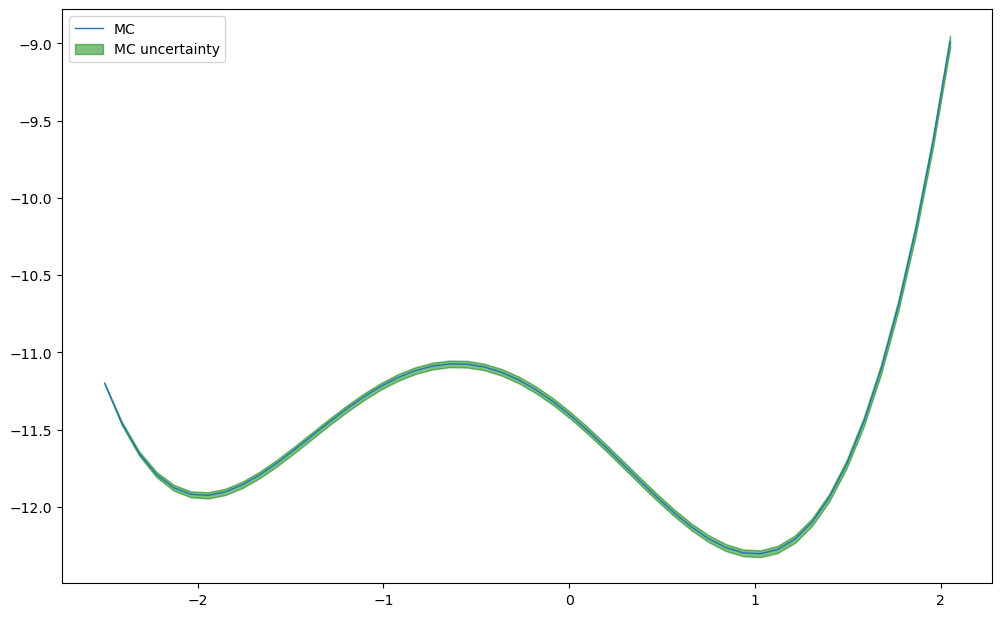

In [47]:
width = 12
height = width / 1.61
fig = plt.figure(figsize=(width, height))
#plt.figure(figsize=(width, height)) 用于创建一个新的 Figure 对象，Figure 是 Matplotlib 中所有图形的容器。
#它包含了所有的绘图元素（如轴、标题、标签等），也是用于显示、保存和管理绘图的核心对象。
plt.plot(xs, y_mean, linewidth=1, label='MC')
plt.fill_between(xs, y_mean - 4 * y_std, y_mean + 4 * y_std, alpha=.5, color='g', label='MC uncertainty')
plt.legend()
plt.show()

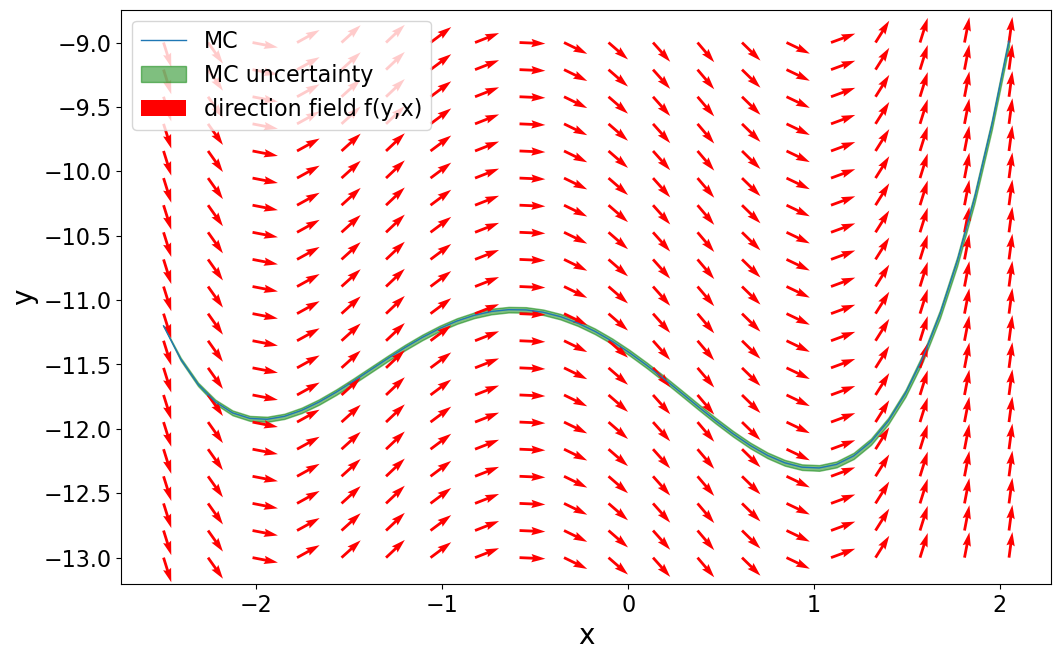

In [50]:
width = 12
height = width / 1.61
fig = plt.figure(figsize=(width, height))

plt.plot(xs, y_mean, linewidth=1, label='MC')
plt.fill_between(xs, y_mean - 4 * y_std, y_mean + 4 * y_std, alpha=.5, color='g', label='MC uncertainty')

xx, yy = np.meshgrid(np.linspace(min(xs), max(xs), 20), np.linspace(-13, -9, 20))

U = 1
V = func(xx)
N = np.sqrt(U**2 + V ** 2)
U2, V2 = U/N, V/N

# U = 1：设定 x 方向的速度分量为 1（保持恒定）。
# V = func(xx)：将 func 函数应用于 xx 网格的每个点，得到 y 方向的速度分量。
# N = np.sqrt(U**2 + V ** 2)：计算速度向量的模（即 U 和 V 的平方和的平方根），用于归一化。
# U2, V2 = U / N, V / N：将 U 和 V 归一化为单位向量 U2 和 V2，确保方向场的箭头长度一致，便于观察方向。

plt.quiver(xx, yy, U2, V2, color='red', label='direction field f(y,x)')
#quiver 函数用于在网格上绘制箭头，形成方向场。
#xx 和 yy 指定箭头的起始位置。
#U2 和 V2 指定箭头的方向和长度。
#color='red' 设置箭头颜色为红色。
plt.xlabel(r'x', fontsize=20)
plt.ylabel(r'y', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(loc='upper left', fontsize=16)

# fig.savefig('solution_direction_field.png', bbox=True, pad_inches=0.2, dpi=300)
# bbox=True 确保保存时图像的边界框不裁剪掉内容。
# pad_inches=0.2 设置边框填充为 0.2 英寸。
# dpi=300 设置图像分辨率为 300 DPI，适合高质量输出

## Creating a random number generator for arbitrary distributions

Suppose we have some random samples with an unknown distribtuion. We can still use the inverse transform method to create a random number generator from a random sample, by estimating the inverse CDF function using interpolation.

In [55]:
from scipy.interpolate import interp1d #https://docs.scipy.org/doc/scipy/tutorial/interpolate.html

def extrap1d(interpolator):
    xs = interpolator.x
    ys = interpolator.y
    
# xs 是插值函数的 x 值，ys 是插值函数的 y 值。
# 这些值分别表示插值函数的已知数据点的 x 和 y 坐标，我们将在外推时使用这些边界点。

    def pointwise(x):
        if x < xs[0]:
            return ys[0]+(x-xs[0])*(ys[1]-ys[0])/(xs[1]-xs[0])
        elif x > xs[-1]:
            return ys[-1]+(x-xs[-1])*(ys[-1]-ys[-2])/(xs[-1]-xs[-2])
        else:
            return interpolator(x)

    def ufunclike(xs):
        return np.array(list(map(pointwise, np.array(xs))))
    # map 函数用于将 pointwise 函数应用到 xs 中的每个元素上。

    return ufunclike

In [56]:
x = np.random.normal(0,1,5)

In [62]:
from statsmodels.distributions.empirical_distribution import ECDF
print(x)
ecdf = ECDF(x)
#ecdf(0) 返回的数据表示在样本 x 中小于或等于 0 的比例。例如，如果有 2 个样本小于等于 0，则 ecdf(0) 返回 2/5 = 0.4。
print(ecdf.x)
print(ecdf.y)
#ecdf.x 和 ecdf.y 分别表示样本数据的排序值和对应的累计概率值

[-1.40535937  1.55457606  0.50348411  0.04630561  1.28865545]
[       -inf -1.40535937  0.04630561  0.50348411  1.28865545  1.55457606]
[0.  0.2 0.4 0.6 0.8 1. ]


(array([0.01855365, 0.0371073 , 0.0371073 , 0.09011773, 0.14577867,
        0.22264379, 0.27035318, 0.29420787, 0.17493441, 0.21734275,
        0.14312815, 0.06361251, 0.07156408, 0.04505886, 0.07951564,
        0.0874672 , 0.09011773, 0.12192398, 0.12192398, 0.10071981,
        0.07951564, 0.0742146 , 0.0371073 , 0.02120417, 0.00530104]),
 array([-2.75425292, -2.37696865, -1.99968438, -1.62240012, -1.24511585,
        -0.86783158, -0.49054732, -0.11326305,  0.26402122,  0.64130549,
         1.01858975,  1.39587402,  1.77315829,  2.15044255,  2.52772682,
         2.90501109,  3.28229535,  3.65957962,  4.03686389,  4.41414816,
         4.79143242,  5.16871669,  5.54600096,  5.92328522,  6.30056949,
         6.67785376]),
 [<matplotlib.patches.Polygon at 0x306dc7110>])

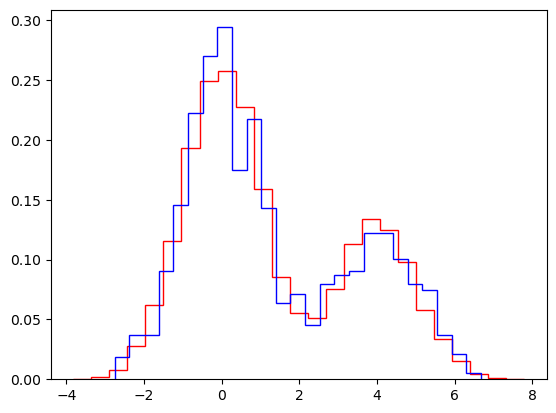

In [63]:
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Make up some random data
x = np.concatenate([np.random.normal(0, 1, 10000), np.random.normal(4, 1, 5000)]) #15000个双峰数据

ecdf = ECDF(x)
inv_cdf = extrap1d(interp1d(ecdf.y, ecdf.x, bounds_error=False, assume_sorted=True))
#这里是因为用了ecdf的推理算了出来，用ecdf.y估计ecdf.x
u = np.random.uniform(0, 1, 1000) #传入ufunclike函数
ys = inv_cdf(u)

plt.hist(x, 25, histtype='step', color='red', density=True, linewidth=1)
plt.hist(ys, 25, histtype='step', color='blue', density=True, linewidth=1)



/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36827 (\N{CJK UNIFIED IDEOGRAPH-8FDB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25554 (\N{CJK UNIFIED IDEOGRAPH-63D2}) missing from current font.
  fig.canvas.print_figure(b

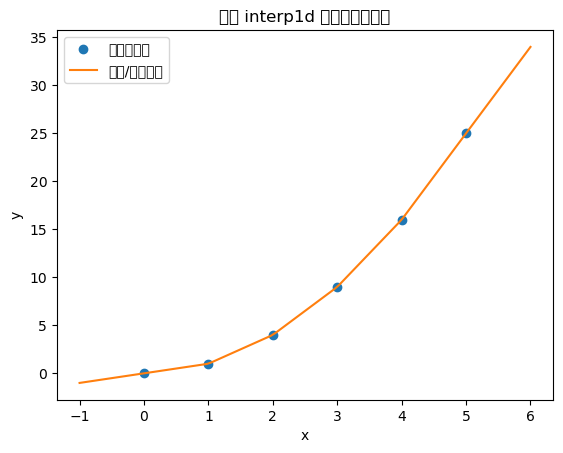

In [64]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# 已知数据点
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 9, 16, 25])  # y = x^2

# 创建插值函数
f = interp1d(x, y, kind='linear', fill_value="extrapolate")

# 使用插值函数计算新的 y 值
x_new = np.linspace(-1, 6, 100)  # 包含插值和外推的范围
y_new = f(x_new)

# 绘制结果
plt.plot(x, y, 'o', label="原始数据点")
plt.plot(x_new, y_new, '-', label="插值/外推曲线")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("使用 interp1d 进行插值和外推")
plt.show()


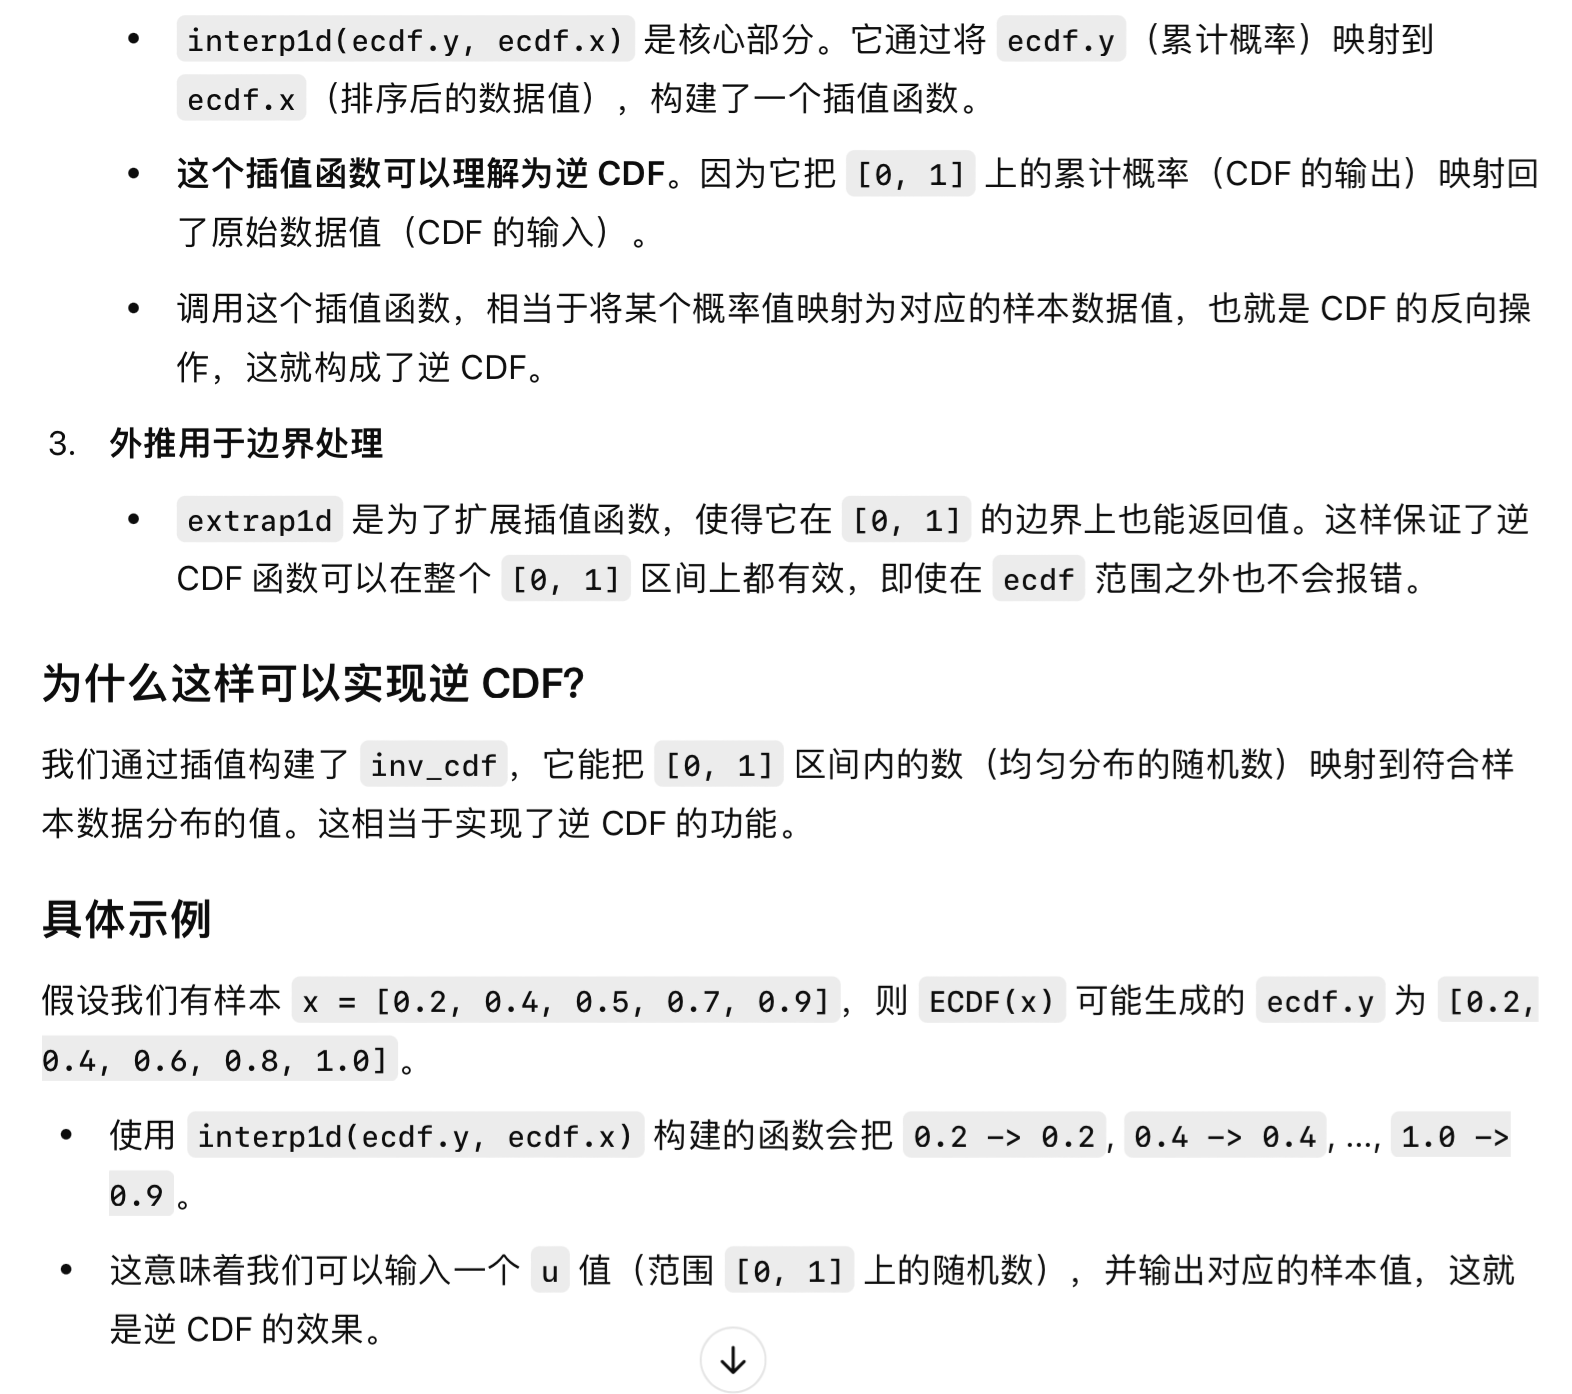